https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#sphx-glr-download-tutorial-10-key-features-005-visualization-py

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from pathlib import Path
import optuna
from reprpo.hp.helpers import optuna_df
from reprpo.training import train
from reprpo.experiments import experiment_configs
from reprpo.hp.space import search_spaces

In [50]:
import warnings
warnings.filterwarnings("ignore")

## Objective

In [5]:
SEED=42
key_metric = "acc_gain_vs_ref/oos"

In [3]:
# # silence please
# import os
# from loguru import logger
# logger.remove()
# logger.remove()
# logger.add(os.sys.stderr, level="WARNING")

In [8]:
key_metric = "acc_gain_vs_ref/oos"

In [ ]:
f_db = f"sqlite:///optuna.db"
f = f_db.replace('sqlite:///', './')
print(f)
Path(f).parent.mkdir(parents=True, exist_ok=True)
f_db

In [5]:
from reprpo.hp.target import override, default_tuner_kwargs
from reprpo.experiments import experiment_configs
import copy

## Opt

Note on pruning. It's only really usefull with validation metrics and for long jobs over many epochs. I've got a small proxy job so there is no need.

In [ ]:
from optuna.study.study import storages, get_all_study_names
study_names = get_all_study_names(storage=f_db)

for study_name in study_names:
    print(study_name)
    study = optuna.load_study(study_name=study_name, storage=f_db)
    try:
        df_res = optuna_df(study, key_metric)
        display(df_res)
        print()
    except ValueError as e:
        print('-')
    if len(df_res): 1/0

In [ ]:
optuna_df(study, key_metric)

## plot

In [28]:
# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_rank
from optuna.visualization.matplotlib import plot_slice
from optuna.visualization.matplotlib import plot_timeline

In [ ]:

print('study.best_trial', study.best_trial)
df = study.trials_dataframe().query('state == "COMPLETE"').sort_values('value', ascending=False)
print(len(df))
plot_optimization_history(study)

In [ ]:
df

In [99]:
from optuna.importance._base import _get_distributions
r = _get_distributions(study, None)
for k,v in r.items():
    print(k)
    print(v)
    print()

Htype
CategoricalDistribution(choices=('ether', 'etherplus', 'oft', 'etherplusHH'))

collect_hs
CategoricalDistribution(choices=(True, False))

collect_input
CategoricalDistribution(choices=(True, False))

flip_side
CategoricalDistribution(choices=(True, False))

lr
FloatDistribution(high=0.001, log=True, low=1e-06, step=None)

nb
IntDistribution(high=32, log=False, low=1, step=1)

reduction
IntDistribution(high=200, log=False, low=1, step=1)

use_angle_loss
CategoricalDistribution(choices=(True, False))

use_dpo_loss
CategoricalDistribution(choices=(True, False))

use_nll_loss
CategoricalDistribution(choices=(True, False))

use_orth_loss
CategoricalDistribution(choices=(True, False))

weight_tokens
CategoricalDistribution(choices=(True, False))

β
FloatDistribution(high=2.0, log=True, low=1e-06, step=None)



In [103]:
pd.DataFrame({k:type(v).__name for k,v in r})

In [101]:
dir(v)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_asdict',
 '_contains',
 'high',
 'log',
 'low',
 'single',
 'step',
 'to_external_repr',
 'to_internal_repr']

In [98]:
from optuna.search_space import intersection_search_space
params = intersection_search_space(study.get_trials(deepcopy=False))
params

{'Htype': CategoricalDistribution(choices=('ether', 'etherplus', 'oft', 'etherplusHH')),
 'collect_hs': CategoricalDistribution(choices=(True, False)),
 'collect_input': CategoricalDistribution(choices=(True, False)),
 'flip_side': CategoricalDistribution(choices=(True, False)),
 'lr': FloatDistribution(high=0.001, log=True, low=1e-06, step=None),
 'nb': IntDistribution(high=32, log=False, low=1, step=1),
 'reduction': IntDistribution(high=200, log=False, low=1, step=1),
 'use_angle_loss': CategoricalDistribution(choices=(True, False)),
 'use_dpo_loss': CategoricalDistribution(choices=(True, False)),
 'use_nll_loss': CategoricalDistribution(choices=(True, False)),
 'use_orth_loss': CategoricalDistribution(choices=(True, False)),
 'weight_tokens': CategoricalDistribution(choices=(True, False)),
 'β': FloatDistribution(high=2.0, log=True, low=1e-06, step=None)}

In [ ]:
for param in params:
    plot_slice(study, params=[param])


In [61]:
from optuna.visualization._slice import _get_slice_plot_info
o = _get_slice_plot_info(study,
                    target_name=key_metric,
                    params=[param],
                    target=None,
                    #  , params=['x', 'y'],
                     )
o

_SlicePlotInfo(target_name='acc_gain_vs_ref/oos', subplots=[_SliceSubplotInfo(param_name='β', x=[2.177484667394932e-05, 4.125104169651939e-06, 5.125997481860622e-05, 0.00011194117628280075, 3.0552919858775247e-06, 0.00013406744164904714, 0.0629488849310978, 5.188001118588271e-06, 1.1427491268016368e-06, 0.009480329103037007, 0.3061018059043467, 0.659967806764974, 1.8975987191914625, 1.9197900904217455, 0.18104117126650143, 0.0018469350337445294, 0.14951216272677859, 0.014076879542587663, 0.21384039312498337, 0.0008051718286843946, 0.03842803161437499, 0.034234182243321705, 0.29485653737200374, 0.0030380378180206473, 0.03133484740818314, 0.5134688717243842, 0.6712472323545516, 0.07591122972980818, 0.612356813333024, 0.6572298672386104, 0.010800540764236085, 0.5091483826110411, 0.5349403416580834, 1.7349984742510394, 0.12607033322398803, 0.4233627428579185, 0.9764502101221318, 0.07781838586422447, 0.0005231450782614883, 0.2836034754839211, 1.495070410162666e-05, 0.03203112963349447, 0.98

In [64]:
df

,number,value,datetime_start,datetime_complete,duration,params_Htype,params_collect_hs,params_collect_input,params_flip_side,params_lr,params_nb,params_reduction,params_use_angle_loss,params_use_dpo_loss,params_use_nll_loss,params_use_orth_loss,params_weight_tokens,params_β,state
206,206,1.169231,2024-10-04 00:00:33.891522,2024-10-04 00:03:46.980716,0 days 00:03:13.089194,oft,False,False,True,0.000603,32,31,True,False,False,False,False,0.304909,COMPLETE
201,201,1.169231,2024-10-03 23:44:23.195293,2024-10-03 23:47:37.077649,0 days 00:03:13.882356,oft,False,False,True,0.000635,30,18,True,False,False,False,False,0.423559,COMPLETE
192,192,1.169231,2024-10-03 23:15:22.887048,2024-10-03 23:18:36.593224,0 days 00:03:13.706176,oft,False,False,True,0.000615,30,25,True,False,False,False,False,0.403787,COMPLETE
114,114,1.167308,2024-10-03 18:54:10.764581,2024-10-03 18:57:23.278613,0 days 00:03:12.514032,oft,False,False,True,0.000629,29,37,True,False,False,False,False,0.386088,COMPLETE
147,147,1.167308,2024-10-03 20:45:09.706327,2024-10-03 20:48:44.518194,0 days 00:03:34.811867,oft,False,False,True,0.000674,32,1,True,False,False,False,False,0.504319,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,0.421154,2024-10-03 23:34:44.150672,2024-10-03 23:37:56.795758,0 days 00:03:12.645086,oft,False,False,True,0.000517,31,11,True,False,False,False,False,0.001926,COMPLETE
189,189,0.421154,2024-10-03 23:05:39.317281,2024-10-03 23:08:50.456712,0 days 00:03:11.139431,oft,False,False,True,0.000615,29,32,True,False,False,False,False,0.022141,COMPLETE
37,37,0.415385,2024-10-03 14:45:20.990056,2024-10-03 14:48:18.063529,0 days 00:02:57.073473,ether,True,False,True,0.000183,11,159,False,False,False,True,True,0.077818,COMPLETE
2,2,0.411538,2024-10-03 12:54:37.449985,2024-10-03 12:57:51.649113,0 days 00:03:14.199128,etherplus,False,False,False,0.000044,29,78,False,False,False,True,True,0.000051,COMPLETE


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

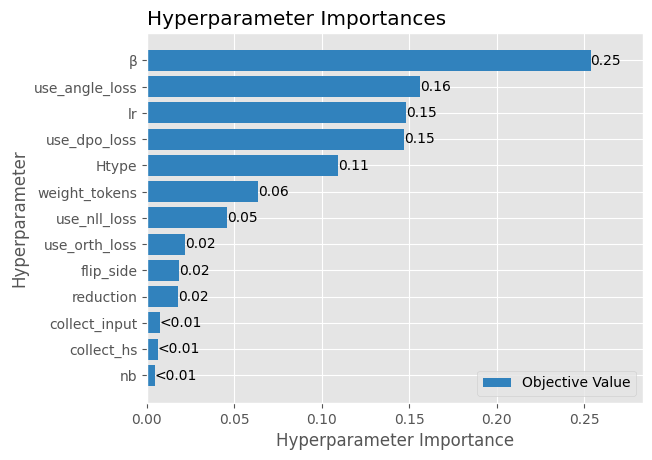

In [68]:
plot_param_importances(study)

<Axes: xlabel='params_β', ylabel='value'>

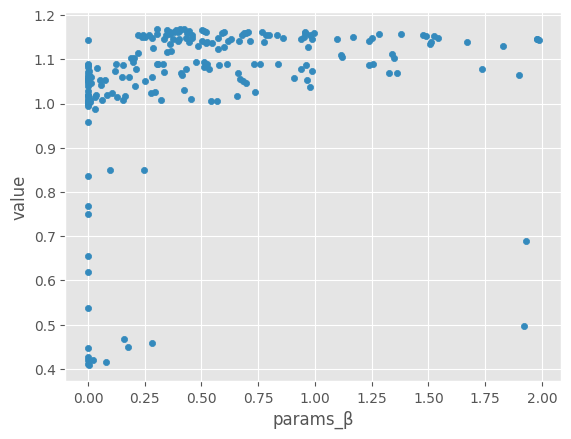

In [67]:

df2 = df.query(f'state=="COMPLETE"')


In [91]:
df_res

,importance,best
"side-ether-prefvec N=✓208/209, best=1.169",,
lr,0.368,0.000615
nb,0.219,30
β,0.218,0.403787
reduction,0.146,25
flip_side,0.014,True
use_dpo_loss,0.013,False
collect_hs,0.011,False
Htype,0.010,oft
use_nll_loss,0.000,False


In [96]:
i = df2['params_nb'][0]
print(i)
isinstance(i, int)

5


False

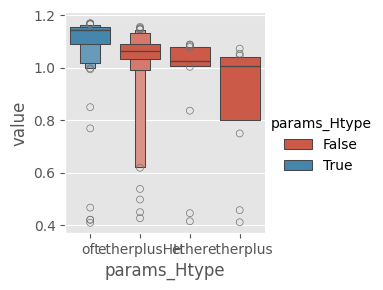

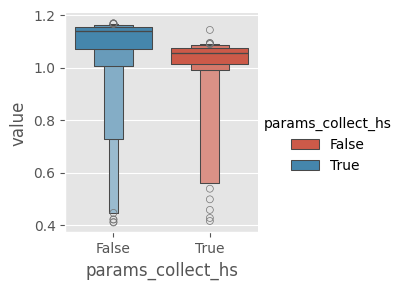

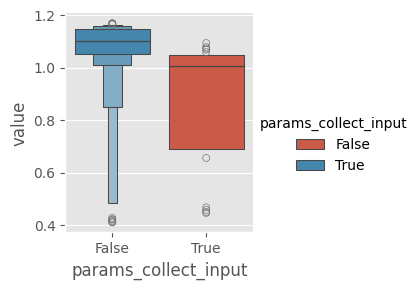

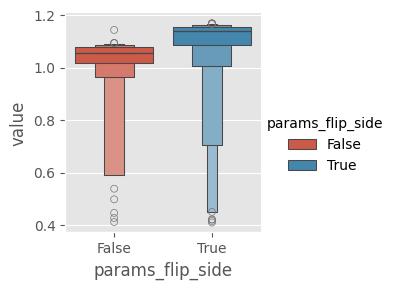

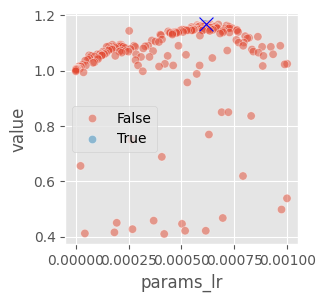

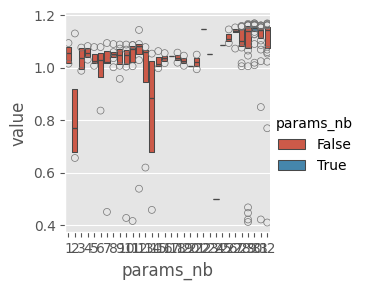

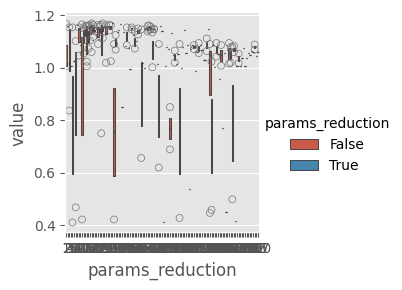

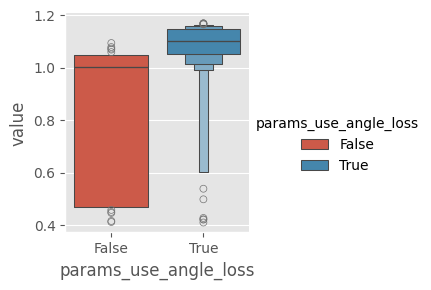

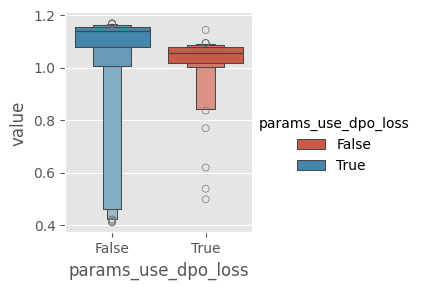

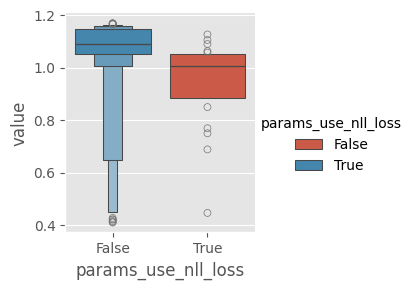

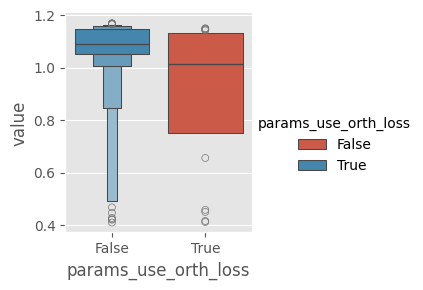

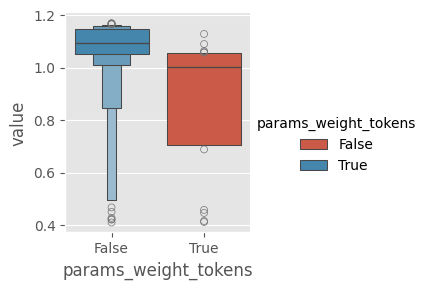

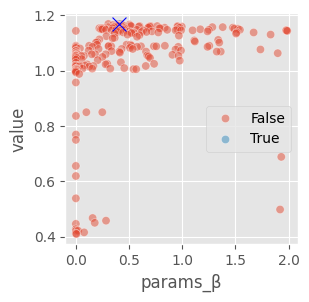

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

for param in params:
    best = df_res['best'][param]
    x = f"params_{param}"
    hue = df2[x].apply(lambda x: x == best)
    if isinstance(df[x][0], (int, float)):
        plt.figure(figsize=(3, 3))
        # df2[[x, 'value']].plot.scatter(x=x, y='value', ax=plt.gca())
        sns.scatterplot(data=df2, x=x, y='value', hue=hue, alpha=0.5, ax=plt.gca())
        sns.scatterplot(data=df2[hue], x=x, y='value', ax=plt.gca(), marker='x', color='blue', s=100)
    else:
        sns.catplot(data=df2, x=x, y="value", kind="boxen", height=3, hue=hue)

    plt.show()